## Dataset: Mental Health in Tech Survey 
### Survey on Mental Health in the Tech Workplace in 2014 (source: kaggle.com)
## 1. Explore the Data Set

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the csv file into a dataframe

dataset_url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQsVFyvvy0BZN_e52WqNNPEppC29T5iNTxArsdx4_MBWsfgdYPfzZtxfQ_85GPbnCUoV-gAISQsdxXI/pub?gid=251244953&single=true&output=csv"
df = pd.read_csv(dataset_url)

In [3]:
# Explore the data set

df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
# Print the number of columns and rows in the dataset.

print('Number of columns in the dataset:', df.shape[1])
print('Number of rows in the dataset:', df.shape[0])

Number of columns in the dataset: 27
Number of rows in the dataset: 1259


In [5]:
# Identify the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [6]:
# Print how many unique countries and participants from these countries

countries_list = df['Country'].unique().tolist()
print("Number of unique countries:", len(countries_list), "\n")

countries = df['Country'].value_counts().to_frame().reset_index()
countries.columns = ['countries', 'participants']
countries.index = countries.index + 1
print(countries.head(3), "\n...\n", countries.tail(3))

Number of unique countries: 48 

        countries  participants
1   United States           751
2  United Kingdom           185
3          Canada            72 
...
        countries  participants
46    Costa Rica             1
47         Spain             1
48  Bahamas, The             1


## 2. Data Cleaning

In [7]:
# Identify if duplicate values are in the dataset

df.duplicated().value_counts()

# No duplicate values were found
# df = df.drop_duplicates() - nothing to remove

False    1259
dtype: int64

In [8]:
# Find the missing values for all columns

missing_values_df = df.isna()

for column in missing_values_df.columns:
    if len(missing_values_df[column].value_counts().tolist()) == 2:
        print(column,':', missing_values_df[column].value_counts()[1])
    else:
        print(column,': 0')

Timestamp : 0
Age : 0
Gender : 0
Country : 0
state : 515
self_employed : 18
family_history : 0
treatment : 0
work_interfere : 264
no_employees : 0
remote_work : 0
tech_company : 0
benefits : 0
care_options : 0
wellness_program : 0
seek_help : 0
anonymity : 0
leave : 0
mental_health_consequence : 0
phys_health_consequence : 0
coworkers : 0
supervisor : 0
mental_health_interview : 0
phys_health_interview : 0
mental_vs_physical : 0
obs_consequence : 0
comments : 1095


In [9]:
# Imput some missing values

# Find the value counts for the column "self_employed"

df['self_employed'].value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

In [10]:
# Identify the value that is most frequent (majority) in the "self_employed" column

top_value = df['self_employed'].value_counts().idxmax()

# Replace all the empty rows in the column "self_employed" with the "top_value"

df['self_employed'] = df['self_employed'].fillna(value=top_value)

# Verify if imputing was successful

df['self_employed'].isna().value_counts()

False    1259
Name: self_employed, dtype: int64

In [11]:
# Identify the values that are identical but written differently

df['Gender'].value_counts().head(10)

Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: Gender, dtype: int64

In [12]:
# Standardize most values into two categories "Male" and "Female"

df['Gender'] = df['Gender'].replace(to_replace =["male", "M", "m", "Make", "Male ", "Man"], value ="Male")
df['Gender'] = df['Gender'].replace(to_replace =["female", "F", "f", "Woman", "Female ", "Femake"], value ="Female")

df['Gender'].value_counts().head(10)

Male              980
Female            242
Female (trans)      2
Cis Male            2
maile               1
Cis Female          1
queer               1
Mal                 1
Female (cis)        1
woman               1
Name: Gender, dtype: int64

In [13]:
# Replace age value outliers with median age value

df['Age'].mask(df['Age'] < 0, 31, inplace=True)
df['Age'].mask(df['Age'] > 100, 31, inplace=True)

## 3. Exploratory Data Analysis

In [14]:
# Explore the age category

df['Age'].describe()

count    1259.000000
mean       32.015091
std         7.360613
min         5.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

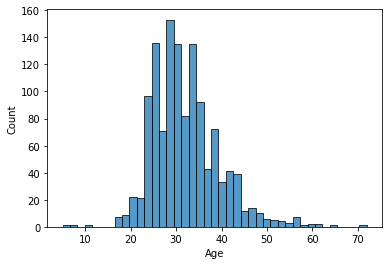

In [15]:
# Plot a histogram of the column "Age"

sns.histplot(df['Age'], stat='count')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f73bd8fea60>,
 'caps': [<matplotlib.lines.Line2D at 0x7f73bd90e160>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f73bd8fe700>],
 'medians': [<matplotlib.lines.Line2D at 0x7f73bd90e820>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f73bd90eb80>],
 'means': []}

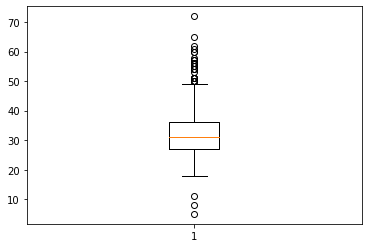

In [16]:
# Find out if outliers exist in the column "Age" using a box plot

plt.boxplot(df['Age'])

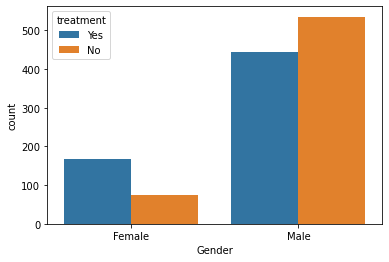

In [17]:
# Bar chart "How many respondents sought treatment for a mental health condition sorted by gender?"

gender_mf = df[(df["Gender"] == "Male") | (df["Gender"] == "Female")]
gender_mf["Gender"].value_counts()

ax = sns.countplot(x="Gender", hue="treatment", data=gender_mf)

In [18]:
# Find out if employer provide mental health benefits

benefits_count = df['benefits'].value_counts().to_frame().reset_index()
benefits_count.columns = ['benefits', 'counts']
benefits_count

,benefits,counts
0,Yes,477
1,Don't know,408
2,No,374


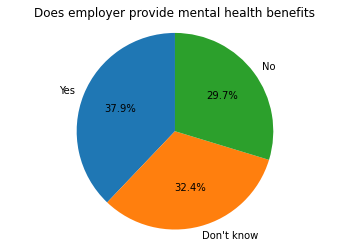

In [19]:
# Pie chart to reflect "Does employer provide mental health benefits?

labels = benefits_count['benefits']
sizes = benefits_count['counts']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Does employer provide mental health benefits")
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Please see Tableau dashboards for more visualizations
## Thank you